In [21]:
import pandas as pd

# import IPython.display as dis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# import time
import pathlib as pl


def cosine(X, P, phi, A, B) -> float:
    return abs(A) + abs(B) * np.cos(2 * np.pi / P * X + phi)


def d_mm(d1: int, d2: int = 0, neutral_offset: float = 50) -> float:
    """
    Returns actual distance between grating 1 and 2 in mm.

    Parameters
    ----------
    d1, d2: z position of kohzu 1 and 2 in pulse units.
            If only 1 distance is passed, it is interpreted as the sum of both kohzu 1 and 2.
    neutral_offset: Distance between gratings with kohzu 1 and 2 at origin (0 pulse units).
                    Must be non-negative.
    """

    return neutral_offset - (d1 + d2) * 0.25e-3


date = "16may2022"

# Find all CSV files for this dataset
for file in pl.Path.cwd().glob(date + "//*.csv"):
    print(file)

scan_names = [str(file) for file in pl.Path.cwd().glob(date + "//*.csv")]
scan_name_aligned = (
    date + "//babyinterferometer_polization_aligned_measurements_1503.csv"
)
scan_name_antialigned = (
    date + "//babyinterferometer_polization_antialigned_measurements_1527.csv"
)

contrast = []

C:\Users\Dima's group\Documents\Python Scripts\nir_images\tim_measurements\16may2022\babyinterferometer_polization_aligned_measurements_1503.csv
C:\Users\Dima's group\Documents\Python Scripts\nir_images\tim_measurements\16may2022\babyinterferometer_polization_antialigned_measurements_1527.csv


## Power Meter Measurements

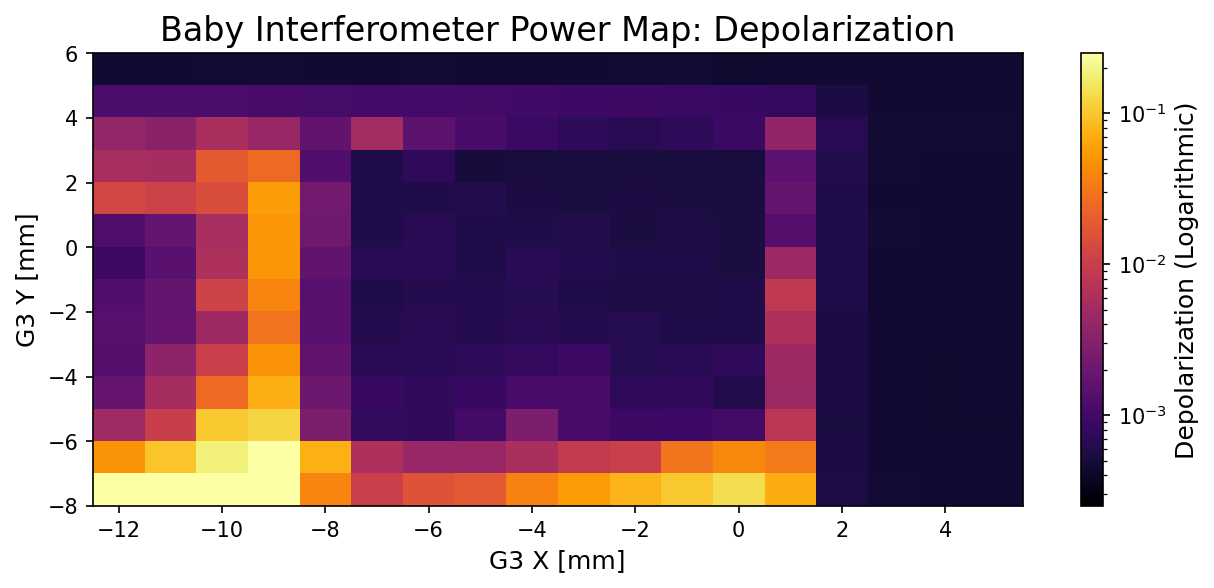

In [49]:
# reads csv with pandas and stores everything in scan_df

scan_df_aligned = pd.read_csv(
    scan_name_aligned,
    usecols=["Power - Mean [W]", "G3 X Translation", "G3 Y Translation"],
)

scan_df_antialigned = pd.read_csv(
    scan_name_antialigned,
    usecols=["Power - Mean [W]", "G3 X Translation", "G3 Y Translation"],
)
# stores G3 (sample) x-axis positions
x_values = np.unique(scan_df_aligned["G3 X Translation"])
# finds phase step of measurement as the sum of G1 and G2 x-axis translation
y_values = np.unique(scan_df_aligned["G3 Y Translation"])

power_array_aligned = []
power_array_antialigned = []


for x in x_values:  # loop through every d_value

    power = []  # list of all measured power values at a given grating distance d
    # print(scan_df['Power - Mean [W]'][scan_df('G1 Z Translation')])
    for y in y_values:  # loop through the phase steps (to reconstruct wave in x-dir)

        power_list = scan_df_aligned["Power - Mean [W]"][
            np.array(scan_df_aligned["G3 Y Translation"] == y)
            & np.array(scan_df_aligned["G3 X Translation"] == x)
        ]
        # print(power_list)

        I = np.mean(power_list, axis=(0))

        power.append(I)

    # calculate contrast at each given grating distance d and store it in dict
    #         contrast_period_dict[d] = [100*(max(power)-min(power))/(max(power)+min(power)), Pg*L/d_mm(d)]
    power_array_aligned.append(power)

for x in x_values:  # loop through every d_value

    power = []  # list of all measured power values at a given grating distance d
    # print(scan_df['Power - Mean [W]'][scan_df('G1 Z Translation')])
    for y in y_values:  # loop through the phase steps (to reconstruct wave in x-dir)

        power_list = scan_df_antialigned["Power - Mean [W]"][
            np.array(scan_df_antialigned["G3 Y Translation"] == y)
            & np.array(scan_df_antialigned["G3 X Translation"] == x)
        ]
        # print(power_list)

        I = np.mean(power_list, axis=(0))

        power.append(I)

    # calculate contrast at each given grating distance d and store it in dict
    #         contrast_period_dict[d] = [100*(max(power)-min(power))/(max(power)+min(power)), Pg*L/d_mm(d)]
    power_array_antialigned.append(power)

power_array_antialigned = np.asarray(power_array_antialigned)
power_array_aligned = np.asarray(power_array_aligned)

power_array = power_array_antialigned / (power_array_aligned + power_array_antialigned)

# Plot the 2D Power Map
fig = plt.figure(figsize=(10, 4), dpi=150)
# shading='nearest' for grid, 'gouraud' for smooth, don't use 'flat'
# cmap='viridis' or 'inferno'
# flipped due to nature of motors (negative is up and to the right)
# norm=colors.LogNorm: logarithmic normalization
power_map = plt.pcolormesh(
    np.negative(x_values) * 0.25e-3,
    np.negative(y_values) * 0.05e-3,
    np.transpose(power_array),
    norm=colors.LogNorm(vmax=0.25, vmin=2.5e-4),
    cmap="inferno",
    shading="nearest",
)
plt.title("Baby Interferometer Power Map: Depolarization", size=16)
plt.ylabel("G3 Y [mm]", size=12)
plt.xlabel("G3 X [mm]", size=12)
plt.colorbar.label = "Power [W]"
plt.colorbar(power_map).ax.set_ylabel("Depolarization (Logarithmic)", size=12)
plt.savefig("figures/babyInterferometer_depolarization_logscale_{}.png".format(date))
plt.show()

## Power Map

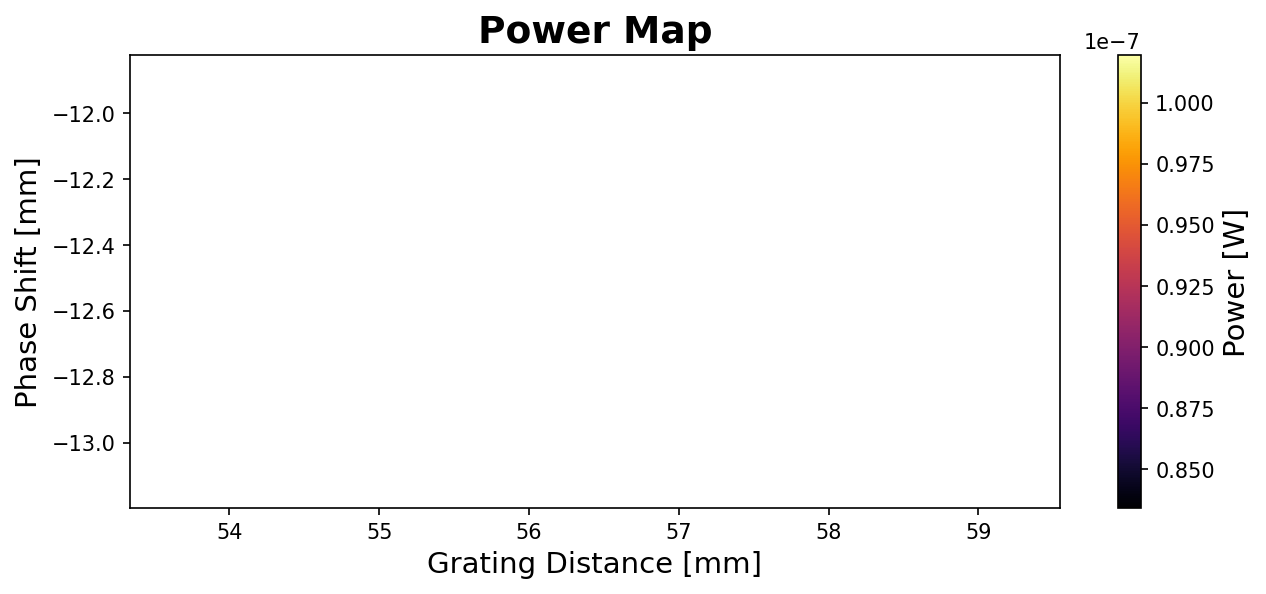